# Pattern Recognition Assignment 1
### BY Sravanth Chowdary Potluri CS20B1006

1. Calculate the distance between the two normalized histograms H1 and H2 using each of the following methods:
(a) KL Distance
(b) Bhattacharyya Distance
H1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]
H2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Defining the histograms
H1 = np.array([ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04])
H2 = np.array([ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02])

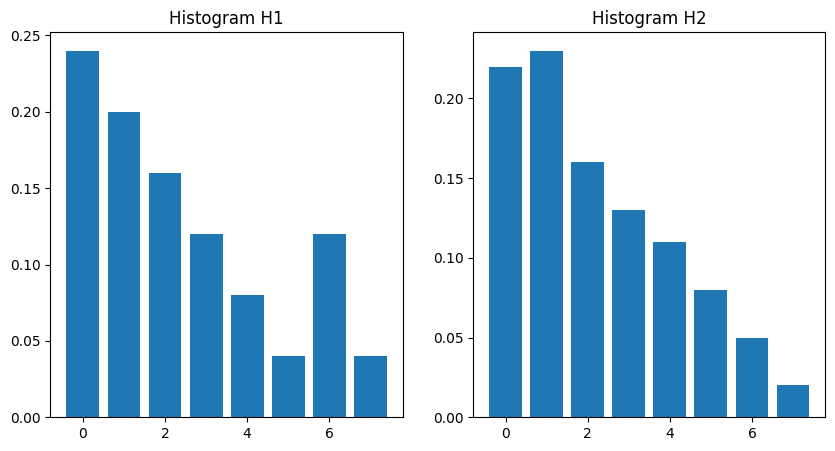

In [3]:
# plotting the histograms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(np.arange(8),H1)
plt.title("Histogram H1")
plt.subplot(1,2,2)
plt.bar(np.arange(8),H2)
plt.title("Histogram H2")
plt.show()

In [4]:
# function to find KL distance
def KL_distance(H1,H2):
    return np.sum(H1*np.log(H1/H2))

In [5]:
# function to find Bhattacharyya distance
def Bhattacharyya_distance(H1,H2):
    return -np.log(np.sum(np.sqrt(H1*H2)))

In [6]:
# printing the KL distance
print("KL distance between H1 and H2 is",KL_distance(H1,H2))

KL distance between H1 and H2 is 0.06290516707464022


In [7]:
# printing the Bhattacharyya distance
print("Bhattacharyya distance between H1 and H2 is",Bhattacharyya_distance(H1,H2))

Bhattacharyya distance between H1 and H2 is 0.014830056106628986


2.Given (hq − ht)T = (0.5 0.5 -0.5 -0.25 -0.25) and

A = [[1,0.135,0.195,0.137,0.157],[0.135,1,0.2,0.309,0.143],[0.195,0.2,1,0.157,0.122],[0.137,0.309,0.157,1,0.195],[0.157,0.143,0.122,0.195,1]]

Find the quadratic form distance.

In [8]:
# function to find the quadratic form distance given hq-ht.T and A
def quadratic_form_distance(hq_htT,A):
    return np.sqrt(np.dot(np.dot(hq_htT,A),hq_htT.T))

In [9]:
# defining hq-ht.T
hq_htT = np.array([0.5,0.5,-0.5,-0.25,-0.25])

In [10]:
# defining A
A = np.array([[1,0.135,0.195,0.137,0.157],[0.135,1,0.2,0.309,0.143],[0.195,0.2,1,0.157,0.122],[0.137,0.309,0.157,1,0.195],[0.157,0.143,0.122,0.195,1]])

In [11]:
# printing the quadratic form distance
print("The quadratic form distance is",quadratic_form_distance(hq_htT,A))

The quadratic form distance is 0.8078520904224981


3.Compare two text files doc1.txt and doc2.txt using cosine distance.
doc1.txt
MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are
vectors and matrices, so you must be familiar with these before making extensive use of this program.
doc2.txt
MATLAB works with essentially one kind of object, a rectangular numerical matrix. Here is some basic
information on using MATLAB matrix commands

In [12]:
# defining the two documents
doc1 = "MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are vectors and matrices, so you must be familiar with these before making extensive use of this program."
doc2 = "MATLAB works with essentially one kind of object, a rectangular numerical matrix. Here is some basic information on using MATLAB matrix commands"

In [13]:
# function to find the cosine distance between two documents
def cosine_distance(doc1,doc2):
    # converting the documents to lower case
    doc1 = doc1.lower()
    doc2 = doc2.lower()
    # removing the punctuations
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in doc1:
        if x in punctuations:
            doc1 = doc1.replace(x,"")
    for x in doc2:
        if x in punctuations:
            doc2 = doc2.replace(x,"")
    # converting the documents to lists
    doc1 = doc1.split()
    doc2 = doc2.split()
    # finding the unique words in the documents
    unique_words = list(set(doc1+doc2))
    # creating the vectors for the documents
    doc1_vector = np.zeros(len(unique_words))
    doc2_vector = np.zeros(len(unique_words))
    # filling the vectors with the word counts
    for i in range(len(unique_words)):
        doc1_vector[i] = doc1.count(unique_words[i])
        doc2_vector[i] = doc2.count(unique_words[i])
    # finding the cosine distance
    return 1-np.dot(doc1_vector,doc2_vector)/(np.linalg.norm(doc1_vector)*np.linalg.norm(doc2_vector))

In [14]:
# printing the cosine distance
print("The cosine distance between the two documents is",cosine_distance(doc1,doc2))

The cosine distance between the two documents is 0.7136718566608999


Classify flower 1, 51, and 101 from the Iris Dataset (.csv file) attached along with the assignment document
into one of the three classes as given in dataset specification:
Dataset Specifications:
Total number of samples = 150
Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)
The number of samples in each class = 50
Directions to classify:
1. Use features PetalLengthCm and PetalWidthCm only for classification.
2. Consider
owers 1,51 and 101 as test cases.
3. Plot the distribution of rest 147 sample points along with their classes( difierentiate classes with different
colour). Consider PetalWidthCm along Y-axis and PetalLengthCm along X-axis.
4. Capture the properties of the distribution and use suitable distance metrics to classify the
owers 1,51 and
101 into one of the classes.
5. Print their class and plot the points on the previous plot with a marker differentiating the three points.

In [15]:
# importing the dataset
data = pd.read_csv("Iris.csv")
# removing id,sepal length and sepal width
data = data.drop(["Id","SepalLengthCm","SepalWidthCm"],axis=1)

In [16]:
# displaying the data
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [17]:
# seperating flowers 1,51 and 101 and dropping them from the dataset
flower1 = data.iloc[0]
flower51 = data.iloc[50]
flower101 = data.iloc[100]
data = data.drop([0,50,100],axis=0)

In [18]:
# displaying the flowers
flower1
flower51
flower101

PetalLengthCm               6.0
PetalWidthCm                2.5
Species          Iris-virginica
Name: 100, dtype: object

In [19]:
# displaying the data
data

,PetalLengthCm,PetalWidthCm,Species
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
5,1.7,0.4,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


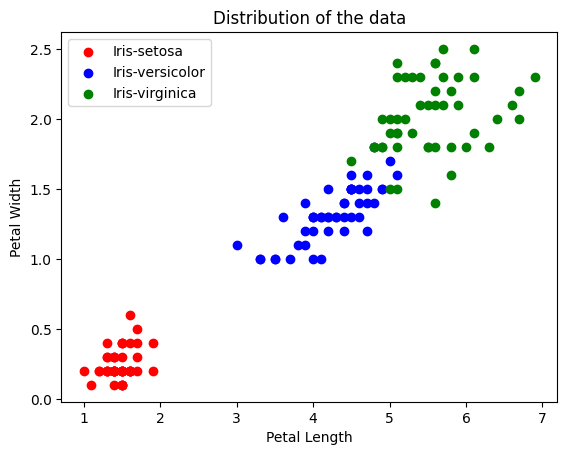

In [20]:
# plotting the data with different colors for different classes
plt.scatter(data[data["Species"]=="Iris-setosa"]["PetalLengthCm"],data[data["Species"]=="Iris-setosa"]["PetalWidthCm"],color="red")
plt.scatter(data[data["Species"]=="Iris-versicolor"]["PetalLengthCm"],data[data["Species"]=="Iris-versicolor"]["PetalWidthCm"],color="blue")
plt.scatter(data[data["Species"]=="Iris-virginica"]["PetalLengthCm"],data[data["Species"]=="Iris-virginica"]["PetalWidthCm"],color="green")
# labelling the legend
plt.legend(["Iris-setosa","Iris-versicolor","Iris-virginica"])
# labeling the axes
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
# labeling the plot
plt.title("Distribution of the data")
# displaying the plot
plt.show()

In [21]:
# seperating the data into three classes
setosa = data[data["Species"]=="Iris-setosa"]
versicolor = data[data["Species"]=="Iris-versicolor"]
virginica = data[data["Species"]=="Iris-virginica"]

In [22]:
# dropping the species column
setosa = setosa.drop(["Species"],axis=1)
versicolor = versicolor.drop(["Species"],axis=1)
virginica = virginica.drop(["Species"],axis=1)


In [23]:
# dropping the species from the flowers 1,51 and 101 and displaying them
flower1_species = flower1["Species"]
flower51_species = flower51["Species"]
flower101_species = flower101["Species"]
flower1 = flower1.drop(["Species"])
flower51 = flower51.drop(["Species"])
flower101 = flower101.drop(["Species"])
print("The species of flower 1 is",flower1_species)
print("The species of flower 51 is",flower51_species)
print("The species of flower 101 is",flower101_species)

The species of flower 1 is Iris-setosa
The species of flower 51 is Iris-versicolor
The species of flower 101 is Iris-virginica


In [24]:
# function to find the mahalanobis distance between two points
def mahalanobis_distance(x,mean,cov):
    return np.sqrt(np.dot(np.dot((x-mean).T,np.linalg.inv(cov)),(x-mean)))

In [25]:
print(np.array(flower1[0:]))

[1.4 0.2]


In [26]:
print(flower1[0:]-setosa[["PetalLengthCm","PetalWidthCm"]].mean().values)

PetalLengthCm   -0.065306
PetalWidthCm    -0.044898
Name: 0, dtype: object


In [27]:
# finding the mahalanobis distance between the mean of each class and the test cases
flower1_mahalanobis_distance = np.array([mahalanobis_distance(np.array(flower1[0:]),setosa[["PetalLengthCm","PetalWidthCm"]].mean().values,setosa[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis_distance(flower1[0:],versicolor[["PetalLengthCm","PetalWidthCm"]].mean().values,versicolor[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis_distance(flower1[0:],virginica[["PetalLengthCm","PetalWidthCm"]].mean().values,virginica[["PetalLengthCm","PetalWidthCm"]].cov().values)])
flower51_mahalanobis_distance = np.array([mahalanobis_distance(flower51[0:],setosa[["PetalLengthCm","PetalWidthCm"]].mean().values,setosa[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis_distance(flower51[0:],versicolor[["PetalLengthCm","PetalWidthCm"]].mean().values,versicolor[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis_distance(flower51[0:],virginica[["PetalLengthCm","PetalWidthCm"]].mean().values,virginica[["PetalLengthCm","PetalWidthCm"]].cov().values)])
flower101_mahalanobis_distance = np.array([mahalanobis_distance(flower101[0:],setosa[["PetalLengthCm","PetalWidthCm"]].mean().values,setosa[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis_distance(flower101[0:],versicolor[["PetalLengthCm","PetalWidthCm"]].mean().values,versicolor[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis_distance(flower101[0:],virginica[["PetalLengthCm","PetalWidthCm"]].mean().values,virginica[["PetalLengthCm","PetalWidthCm"]].cov().values)])

In [28]:
# printing the mahalanobis distance
print("The mahalanobis distance between the mean of each class and flower 1 is",flower1_mahalanobis_distance)
print("The mahalanobis distance between the mean of each class and flower 51 is",flower51_mahalanobis_distance)
print("The mahalanobis distance between the mean of each class and flower 101 is",flower101_mahalanobis_distance)

The mahalanobis distance between the mean of each class and flower 1 is [0.48939817 6.22001471 8.83677657]
The mahalanobis distance between the mean of each class and flower 51 is [19.22674048  1.13058007  2.45087485]
The mahalanobis distance between the mean of each class and flower 101 is [29.26732959  6.07968454  1.82310834]


In [29]:
# assigning the class with least mahalanobis distance to the test cases
flower1_class = np.argmin(flower1_mahalanobis_distance)
flower51_class = np.argmin(flower51_mahalanobis_distance)
flower101_class = np.argmin(flower101_mahalanobis_distance)

In [30]:
# printing the class of the test cases
print("The class of flower 1 is",flower1_class)
print("The class of flower 51 is",flower51_class)
print("The class of flower 101 is",flower101_class)

The class of flower 1 is 0
The class of flower 51 is 1
The class of flower 101 is 2


In [31]:
# assigning the species to the classes based on argument
if flower1_class == 0:
    flower1_class = "Iris-setosa"
elif flower1_class == 1:
    flower1_class = "Iris-versicolor"
else:
    flower1_class = "Iris-virginica"
if flower51_class == 0:
    flower51_class = "Iris-setosa"
elif flower51_class == 1:
    flower51_class = "Iris-versicolor"
else:
    flower51_class = "Iris-virginica"
if flower101_class == 0:
    flower101_class = "Iris-setosa"
elif flower101_class == 1:
    flower101_class = "Iris-versicolor"
else:
    flower101_class = "Iris-virginica"

In [32]:
# printing the species of the test cases
print("The species of flower 1 is",flower1_class)
print("The species of flower 51 is",flower51_class)
print("The species of flower 101 is",flower101_class)

The species of flower 1 is Iris-setosa
The species of flower 51 is Iris-versicolor
The species of flower 101 is Iris-virginica


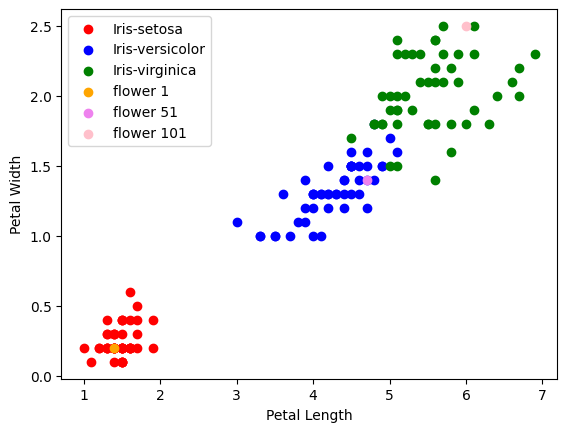

In [33]:
# displaying the graph of dataset with the test cases
plt.scatter(setosa["PetalLengthCm"],setosa["PetalWidthCm"],color="red",label="Iris-setosa")
plt.scatter(versicolor["PetalLengthCm"],versicolor["PetalWidthCm"],color="blue",label="Iris-versicolor")
plt.scatter(virginica["PetalLengthCm"],virginica["PetalWidthCm"],color="green",label="Iris-virginica")
plt.scatter(flower1["PetalLengthCm"],flower1["PetalWidthCm"],color="orange",label="flower 1")
plt.scatter(flower51["PetalLengthCm"],flower51["PetalWidthCm"],color="violet",label="flower 51")
plt.scatter(flower101["PetalLengthCm"],flower101["PetalWidthCm"],color="pink",label="flower 101")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

5. Consider the following images. Obtain the histograms for each of the images. Using a suitable distance mea-
sure, find the distance between the query image and reference images.

In [34]:
# importing the required libraries
import cv2

In [35]:
# reading the images
query_image = cv2.imread("queryimage.png")
refimage1 = cv2.imread("refimage1.png")
refimage2 = cv2.imread("refimage2.png")

In [36]:
# converting the images from BGR to RGB
query_image = cv2.cvtColor(query_image,cv2.COLOR_BGR2RGB)
refimage1 = cv2.cvtColor(refimage1,cv2.COLOR_BGR2RGB)
refimage2 = cv2.cvtColor(refimage2,cv2.COLOR_BGR2RGB)

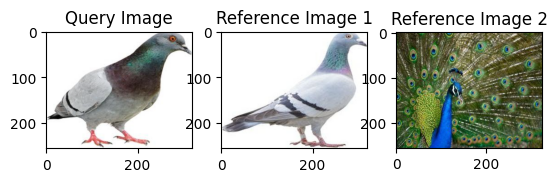

In [37]:
# displaying the images in a single plot
plt.subplot(1,3,1)
plt.imshow(query_image)
plt.title("Query Image")
plt.subplot(1,3,2)
plt.imshow(refimage1)
plt.title("Reference Image 1")
plt.subplot(1,3,3)
plt.imshow(refimage2)
plt.title("Reference Image 2")
plt.show()

In [38]:
# generating the histograms for each image
query_image_hist = cv2.calcHist([query_image],[0],None,[256],[0,256])
refimage1_hist = cv2.calcHist([refimage1],[0],None,[256],[0,256])
refimage2_hist = cv2.calcHist([refimage2],[0],None,[256],[0,256])

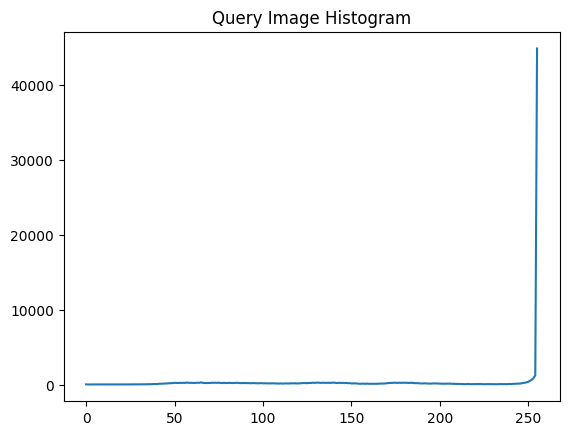

In [39]:
# displaying the query image histogram
plt.plot(query_image_hist)
plt.title("Query Image Histogram")
plt.show()

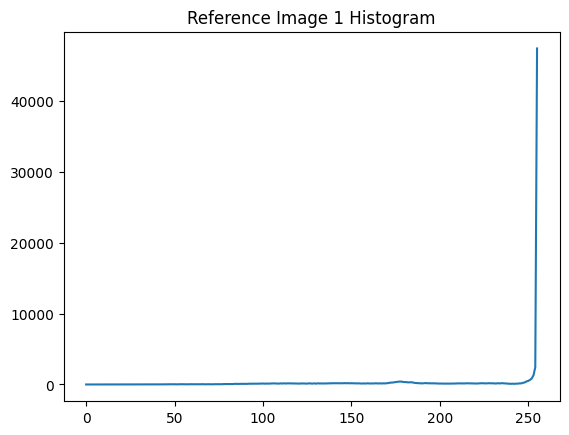

In [40]:
# displaying the reference image 1 histogram
plt.plot(refimage1_hist)
plt.title("Reference Image 1 Histogram")
plt.show()

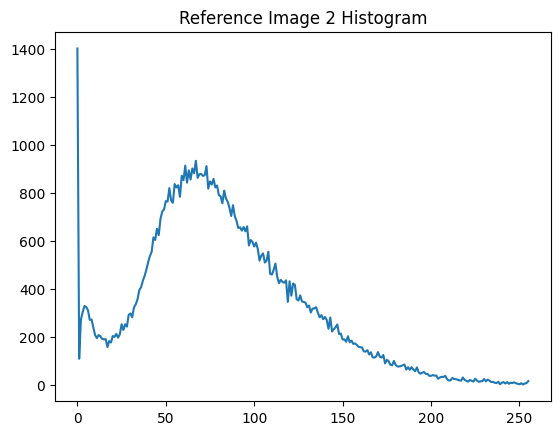

In [41]:
# displaying the reference image 2 histogram
plt.plot(refimage2_hist)
plt.title("Reference Image 2 Histogram")
plt.show()

In [42]:
# function to find bhattarcharya distance between two histograms
def Bhattacharyya_distance(H1,H2):
    return -np.log(np.sum(np.sqrt(H1*H2)))

In [43]:
# normalizing the histograms
query_image_hist = query_image_hist/np.sum(query_image_hist)
refimage1_hist = refimage1_hist/np.sum(refimage1_hist)
refimage2_hist = refimage2_hist/np.sum(refimage2_hist)

In [44]:
# using the function to find the distance between query image and reference image 1 using bhattacharyya distance
refimage1_distance = Bhattacharyya_distance(query_image_hist,refimage1_hist)
print("The distance between query image and reference image 1 using bhattacharyya distance is",refimage1_distance)

The distance between query image and reference image 1 using bhattacharyya distance is 0.033283755


In [45]:
# using the function to find the distance between query image and reference image 2 using bhattacharyya distance
refimage2_distance = Bhattacharyya_distance(query_image_hist,refimage2_hist)
print("The distance between query image and reference image 2 using bhattacharyya distance is",refimage2_distance)


The distance between query image and reference image 2 using bhattacharyya distance is 0.54255533


### As you can see, the distance between query image and reference image 1 is a lot less than the distance between query image and reference image 2. Hence, the reference image 1 is more similar to the query image than the reference image 2.